In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import cv2
# import numpy as np
# import os
# from google.colab.patches import cv2_imshow

# # فهرست آدرس تصاویر
# image_paths = ['/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_004.jpg', '/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_018.jpg', '/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_027.jpg']

# augmented_images = []

# for img_path in image_paths:
#     img = cv2.imread(img_path)

#     # اندازه گیری تصویر را تغییر دهید
#     resized_img = cv2.resize(img, (180, 180))

#     #تصویر نرمال سازی شد
#     normalized_img = np.array(resized_img) / 255.0


#     # افزودن تصویر نورمال شده به فهرست تصاویر افزوده شده
#     augmented_images.append(normalized_img)

#     # تکنیک‌های Augmentation
#     # اضافه کردن تصویر روبرو (نسخه انعکاسی)
#     flipped_img = cv2.flip(normalized_img, 1)
#     augmented_images.append(flipped_img)

#     # اضافه کردن تصویر با تغییر سایز
#     scaled_img = cv2.resize(normalized_img, None, fx=1.2, fy=1.2)
#     augmented_images.append(scaled_img)

#     # اضافه کردن تصاویر به 45 درجه چرخش
#     rows, cols, _ = normalized_img.shape
#     M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
#     rotated_img = cv2.warpAffine(normalized_img, M, (cols, rows))
#     augmented_images.append(rotated_img)

# # تبدیل فهرست تصاویر آموزشی به آرایه NumPy
# augmented_images = np.array(augmented_images, dtype='object')

# # ذخیره تصاویر آموزشی اصلاح شده
# #output_dir = 'augmented_images'
# #os.makedirs(output_dir, exist_ok=True)
# for i, image in enumerate(augmented_images):
#     #cv2.imwrite(os.path.join(output_dir, f'augmented_image_{i}.jpg'), image * 255)
#     cv2_imshow((image*255).astype(np.uint8))

In [4]:
# import numpy as np
# import tensorflow as tf
# import cv2
# import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator()

# # مسیر پوشه حاوی تصاویر را مشخص کنید
# image_dir = '/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard'

# images = []
# for image_name in os.listdir(image_dir):
#     if image_name.endswith('.jpg') or image_name.endswith('.png'):
#         image_path = os.path.join(image_dir, image_name)
#         img = cv2.imread(image_path)
#         resized_image = cv2.resize(img, (256, 256)) / 255.0
#         images.append(resized_image)

# x_train = np.array(images)

# # Create a Simple Autoencoder Model
# input_img = tf.keras.layers.Input(shape=(256, 256, 3))
# encoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
# decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(encoded)
# decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)

# autoencoder = tf.keras.models.Model(input_img, decoded)
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# # Train the Model with More Epochs
# autoencoder.fit(datagen.flow(x_train, x_train, batch_size=16), epochs=5)

# # Filter Images
# filtered_images = autoencoder.predict(x_train) * 255.0

# filtered_images = filtered_images.astype(np.uint8)  # Convert to uint8 for proper display

# # Display Filtered Images
# for filtered_image in filtered_images:
#     cv2_imshow(filtered_image)


In [5]:
# import cv2
# import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

# # فهرست آدرس تصاویر
# image_paths = ['/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_004.jpg', '/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_018.jpg', '/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_027.jpg']

# augmented_images = []

# for img_path in image_paths:
#     img = cv2.imread(img_path)

#     # اندازه گیری تصویر را تغییر دهید
#     resized_img = cv2.resize(img, (180, 180))

#     #تصویر نرمال سازی شد
#     normalized_img = np.array(resized_img) / 255.0


#     # افزودن تصویر نورمال شده به فهرست تصاویر افزوده شده
#     augmented_images.append(normalized_img)

# # Convert 64-bit float images to 8-bit unsigned integer
# converted_images = []
# for image in images:
#     image_8bit = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))  # Assuming the range of 64-bit float is [0, 65535]
#     converted_images.append(image_8bit)

# # Apply Histogram Equalization to the LAB color space
# equalized_images = []
# for image in converted_images:
#     lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
#     l, a, b = cv2.split(lab)
#     l_eq = cv2.equalizeHist(l)
#     lab_eq = cv2.merge((l_eq, a, b))
#     equalized_image = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)
#     equalized_images.append(equalized_image)

# # Display Equalized Images
# for equalized_image in equalized_images:
#     cv2_imshow(equalized_image)

In [6]:
# import cv2
# import numpy as np
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape
# from tensorflow.keras.models import Model
# from google.colab.patches import cv2_imshow

# def color_and_lighting_correction(image, reference):
#     # Resize images to MobileNetV2 input size (224x224)
#     image_resized = cv2.resize(image, (224, 224))
#     reference_resized = cv2.resize(reference, (224, 224))

#     # Preprocess images for MobileNetV2
#     image_preprocessed = np.expand_dims(image_resized, axis=0)
#     reference_preprocessed = np.expand_dims(reference_resized, axis=0)

#     # Load MobileNetV2 as base model
#     base_model = MobileNetV2(include_top=False, weights='imagenet')

#     # Global Average Pooling
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)

#     # Reshape layer for compatibility with number of channels
#     x = Reshape((1, 1, 1280))(x)

#     # Create model to predict color and lighting changes
#     model = Model(inputs=base_model.input, outputs=x)

#     # Predict color and lighting changes
#     prediction = model.predict(image_preprocessed) - model.predict(reference_preprocessed)

#     # Apply predicted changes to image
#     corrected_image = np.clip(image + prediction, 0, 255).astype(np.uint8)

#     return corrected_image

# def resize_image(image, size=(224, 224)):
#     return cv2.resize(image, size)

# # Load images
# image_paths = ['/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_004.jpg',
#                '/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_018.jpg',
#                '/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_027.jpg']

# augmented_images = []

# # Load reference image for color and lighting correction
# reference_image = cv2.imread('/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_004.jpg')


# for img_path in image_paths:
#     img = cv2.imread(img_path)

#     # Resize images to the same size
#     resized_image = resize_image(img)
#     resized_reference = resize_image(reference_image)

#     # Apply color and lighting correction
#     corrected_img = color_and_lighting_correction(resized_image, resized_reference)

#     augmented_images.append(corrected_img)
#     cv2_imshow(corrected_img)

In [7]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.models import Model
# from google.colab.patches import cv2_imshow
# from tensorflow.keras.layers import Input


# def match_histogram(source, target):
#     # Normalize the source image to ensure depth is compatible
#     source_norm = cv2.normalize(source, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#     # Convert both source and target images to LAB color space
#     matched = cv2.cvtColor(source_norm, cv2.COLOR_BGR2LAB)
#     target = cv2.cvtColor(target, cv2.COLOR_BGR2LAB)

#     matched_L, _, _ = cv2.split(matched)
#     target_L, _, _ = cv2.split(target)

#     # Calculate the lookup table to match the histograms
#     min_src, max_src = matched_L.min(), matched_L.max()
#     min_tgt, max_tgt = target_L.min(), target_L.max()

#     LUT = np.zeros(256, dtype=np.uint8)
#     for i in range(256):
#         LUT[i] = np.clip((i - min_src) * ((max_tgt - min_tgt) / (max_src - min_src)) + min_tgt, 0, 255).astype(np.uint8)

#     # Apply the LUT to the source image
#     matched_L = cv2.LUT(matched_L, LUT)

#     # Merge the modified L channel back into the LAB image
#     matched[:,:,0] = matched_L

#     # Convert back to BGR color space
#     result = cv2.cvtColor(matched, cv2.COLOR_LAB2BGR)

#     return result

# # Load images
# image_paths = ['/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_004.jpg',
#                '/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_018.jpg',
#                '/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_027.jpg']

# augmented_images = []

# # Load and preprocess the images
# reference_image = cv2.imread('/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard/cardboard_004.jpg')  # Reference image for color and lighting correction

# for img_path in image_paths:
#     img = cv2.imread(img_path)


#     # Resize the image to match MobileNetV2 input size
#     resized_img = cv2.resize(img, (224, 224))

#     # Normalize the image
#     normalized_img = resized_img / 255.0


#     # Matching histograms with the reference image for color consistency
#     matched_img = match_histogram(normalized_img, reference_image)

#     # White balancing for color consistency
#     balanced_img = cv2.xphoto.createSimpleWB().balanceWhite(matched_img)

#     augmented_images.append(balanced_img)
#     cv2_imshow(balanced_img)
# # Continue with the rest of your code (U-Net model, image processing)

In [19]:
#import libraries
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [9]:
# Define the list of tuples containing the folder path and label for each category
folders = [('/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/cardboard', 0), ('/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/glass', 1), ('/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/metal', 2), ('/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/paper', 3), ('/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/plastic', 4), ('/content/drive/My Drive/ai/final1/TrashType_Image_Dataset/trash', 5)]

# Initialize the list for images and labels
images = []
labels = []

# Define the image processing function
def image_procces(folder, label):
    for image_name in os.listdir(folder):
        if image_name.endswith('.jpg') :
            image_path = os.path.join(folder, image_name)
            img = cv2.imread(image_path)
            # resize all images in 180 180
            resized_image = cv2.resize(img, (60, 60))

            # Separate the color channels
            # b, g, r = cv2.split(resized_image)

            # # Apply CLAHE to each color channel
            # clahe = cv2.createCLAHE(clipLimit=1.8, tileGridSize=(8,8))
            # b_clahe = clahe.apply(b)
            # g_clahe = clahe.apply(g)
            # r_clahe = clahe.apply(r)

            # # Merge the color channels
            # resized_image_clahe = cv2.merge([b_clahe, g_clahe, r_clahe])

            # normalize image and add to list
            images.append(resized_image / 255.0)
            labels.append(label)


In [10]:
# Perform image processing, augmentation, and training for each category
for folder, label in folders:
    image_procces(folder, label)

# Convert the lists to numpy arrays
x = np.array(images)
y = np.array(labels)

In [11]:
# Perform oversampling using SMOTE
RANDOM_STATE = 2

# Flatten the images
x_train_flattened = x.reshape(-1, 60 * 60 * 3)

# Perform oversampling using SMOTE
sm = SMOTE(random_state=RANDOM_STATE, sampling_strategy={0:1400, 1:1400, 2:1400, 3:1400, 4:1400, 5:1400})
x_train_resampled, y_train_resampled = sm.fit_resample(x_train_flattened, y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1400) in class 0 will be larger than the number of samples in the majority class (class #3 -> 594)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1400) in class 1 will be larger than the number of samples in the majority class (class #3 -> 594)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1400) in class 2 will be larger than the number of samples in the majority class (class #3 -> 594)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1400) in class 3 will be larger than the number of samples in the majority class (class #3 -> 594)
  warnings.warn(
/usr/loc

In [12]:
# Reshape the images back to their original shape
x_train = x_train_resampled.reshape(-1, 60, 60, 3)
y_train = y_train_resampled

In [13]:
# Create a Simple Autoencoder Model
tf.random.set_seed(42)
input_img = tf.keras.layers.Input(shape=(60, 60, 3))
encoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
decoded = tf.keras.layers.Conv2DTranspose(3, (3, 3), strides=2, activation='sigmoid', padding='same')(encoded)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Model with More Epochs
autoencoder.fit(x_train, x_train, batch_size=8, epochs=2)


Epoch 1/2
1050/1050 [==============================] - 25s 23ms/step - loss: 0.0074
Epoch 2/2
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0021


263/263 [==============================] - 8s 30ms/step


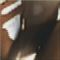

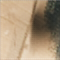

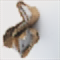

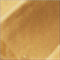

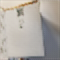

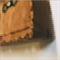

In [14]:
# Filter Images
filtered_images = autoencoder.predict(x_train) * 255.0

# Convert to uint8 for proper display
filtered_images = filtered_images.astype(np.uint8)

i=0
# Display Filtered Images
for filtered_image in filtered_images:
  if i <=5:
    cv2_imshow(filtered_image)
    i+=1


In [15]:
# Split the data into training and testing sets
# Use a consistent random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(filtered_images, y_train, test_size=0.2, random_state=42)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

# Ensure x_train and y_train have the same number of samples
assert x_train.shape[0] == y_train.shape[0], "x_train and y_train must have the same number of samples"

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


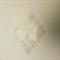

[0. 0. 0. 1. 0. 0.]


In [16]:
t1=x_train[3800]
t2=y_train[3800]
t1 = t1.astype(np.uint8)
cv2_imshow(t1)
print(t2)

In [20]:
tf.random.set_seed(42)
# Define the CNN model
# Define the data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Create a generator to apply data augmentation to the training data
train_generator = datagen.flow(x_train, y_train, batch_size=32)

# Define the model architecture with dropout layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(60, 60, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Define learning rate schedule
def lr_schedule(epoch, lr):
    if epoch % 5 == 0 and epoch!= 0:
        lr = lr * 0.1
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model using the augmented training data
history=model.fit(train_generator, epochs=15, validation_data=(x_test, y_test), callbacks=[lr_scheduler, early_stopping])

Epoch 1/15
210/210 [==============================] - 76s 356ms/step - loss: 1.5961 - accuracy: 0.4854 - val_loss: 2.0657 - val_accuracy: 0.4179 - lr: 0.0010
Epoch 2/15
210/210 [==============================] - 55s 261ms/step - loss: 1.2038 - accuracy: 0.5832 - val_loss: 1.9373 - val_accuracy: 0.3470 - lr: 0.0010
Epoch 3/15
210/210 [==============================] - 56s 268ms/step - loss: 1.0273 - accuracy: 0.6275 - val_loss: 3.5153 - val_accuracy: 0.2815 - lr: 0.0010
Epoch 4/15
210/210 [==============================] - 58s 275ms/step - loss: 0.9529 - accuracy: 0.6583 - val_loss: 1.0981 - val_accuracy: 0.5917 - lr: 0.0010
Epoch 5/15
210/210 [==============================] - 56s 266ms/step - loss: 0.8637 - accuracy: 0.6862 - val_loss: 3.5355 - val_accuracy: 0.4131 - lr: 0.0010
Epoch 6/15
210/210 [==============================] - 62s 294ms/step - loss: 0.7386 - accuracy: 0.7315 - val_loss: 0.6181 - val_accuracy: 0.7720 - lr: 1.0000e-04
Epoch 7/15
210/210 [============================

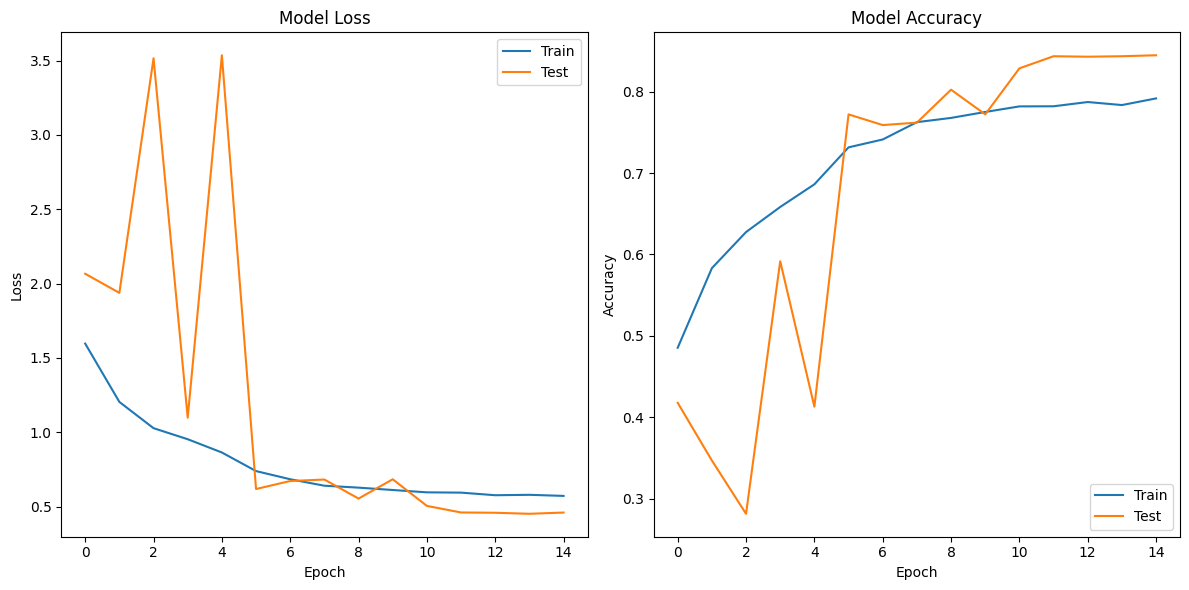

In [21]:
# Plot the training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [22]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

53/53 - 2s - loss: 0.4597 - accuracy: 0.8446 - 2s/epoch - 42ms/step
Test Loss: 0.4597
Test Accuracy: 0.8446


In [23]:
# Get the predictions for the test data
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate F1-score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1-score:", f1)

# Calculate Recall
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)

# Calculate Precision
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision:", precision)

53/53 [==============================] - 2s 44ms/step
F1-score: 0.8445511709709668
Recall: 0.8446428571428571
Precision: 0.8472994344790783


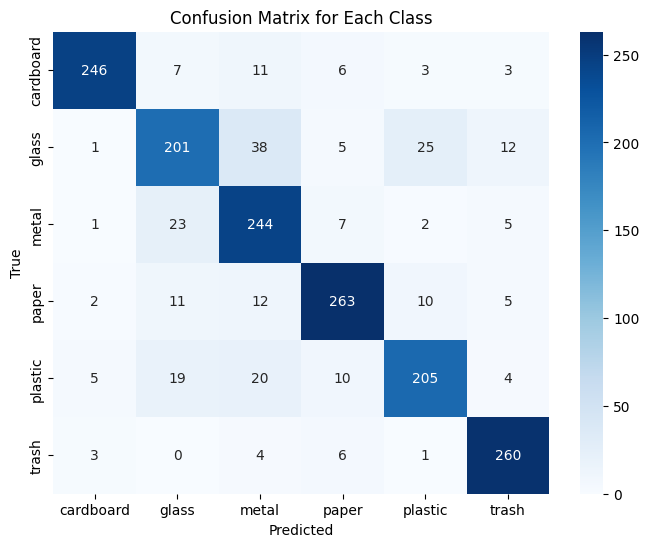

In [24]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Each Class')
plt.show()

**Resnet**

In [25]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Load the ResNet50 architecture
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(60, 60, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers to the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(6, activation='softmax')(x)

# Create the final model
model_resnet = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_resnet.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Define learning rate schedule
def lr_schedule(epoch, lr):
    if epoch % 5 == 0 and epoch != 0:
        lr = lr * 0.1
    return lr

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model using the augmented training data
history_resnet = model_resnet.fit(
    train_generator,
    epochs=15,
    validation_data=(x_test, y_test),
    callbacks=[LearningRateScheduler(lr_schedule), early_stopping]
)

94765736/94765736 [==============================] - 1s 0us/step


Epoch 1/15
210/210 [==============================] - 149s 691ms/step - loss: 1.1305 - accuracy: 0.6333 - val_loss: 0.6941 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/15
210/210 [==============================] - 151s 718ms/step - loss: 0.6837 - accuracy: 0.7534 - val_loss: 0.6310 - val_accuracy: 0.7613 - lr: 0.0010
Epoch 3/15
210/210 [==============================] - 143s 683ms/step - loss: 0.6085 - accuracy: 0.7844 - val_loss: 0.5360 - val_accuracy: 0.8048 - lr: 0.0010
Epoch 4/15
210/210 [==============================] - 147s 701ms/step - loss: 0.5388 - accuracy: 0.8103 - val_loss: 0.5021 - val_accuracy: 0.8185 - lr: 0.0010
Epoch 5/15
210/210 [==============================] - 143s 678ms/step - loss: 0.5011 - accuracy: 0.8244 - val_loss: 0.4466 - val_accuracy: 0.8464 - lr: 0.0010
Epoch 6/15
210/210 [==============================] - 124s 593ms/step - loss: 0.3977 - accuracy: 0.8567 - val_loss: 0.3880 - val_accuracy: 0.8696 - lr: 1.0000e-04
Epoch 7/15
210/210 [======================

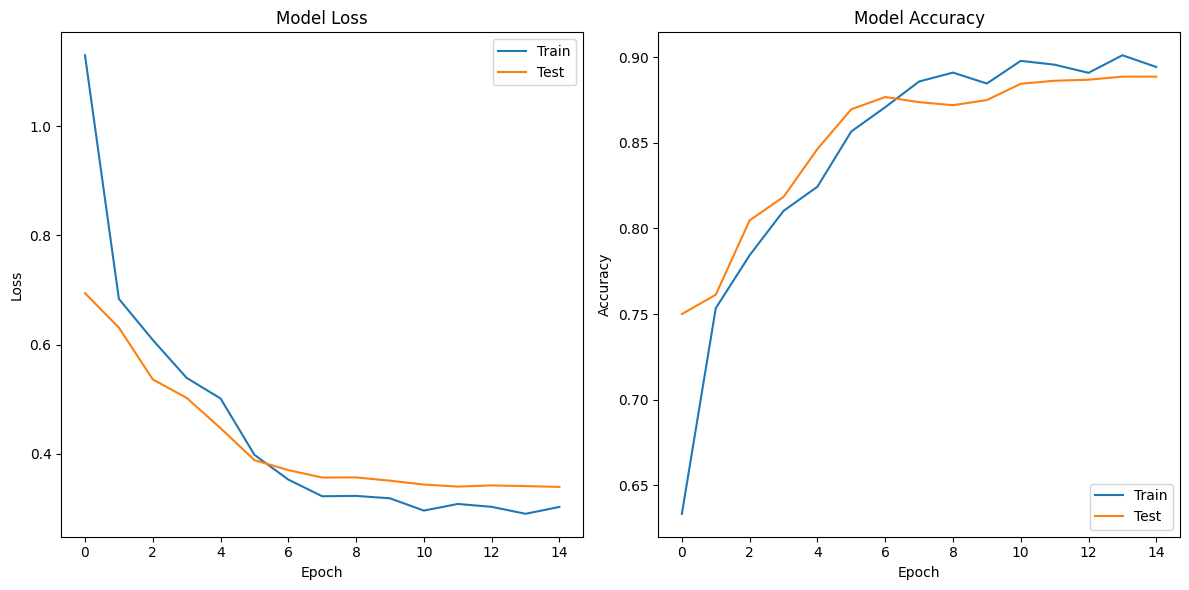

In [26]:
# Plot the training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

In [27]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model_resnet.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

53/53 - 24s - loss: 0.3389 - accuracy: 0.8887 - 24s/epoch - 453ms/step
Test Loss: 0.3389
Test Accuracy: 0.8887


In [28]:
# Get the predictions for the test data
y_pred = np.argmax(model_resnet.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate F1-score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1-score:", f1)

# Calculate Recall
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)

# Calculate Precision
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision:", precision)

53/53 [==============================] - 24s 413ms/step
F1-score: 0.8880742275538634
Recall: 0.8886904761904761
Precision: 0.8902921006454738


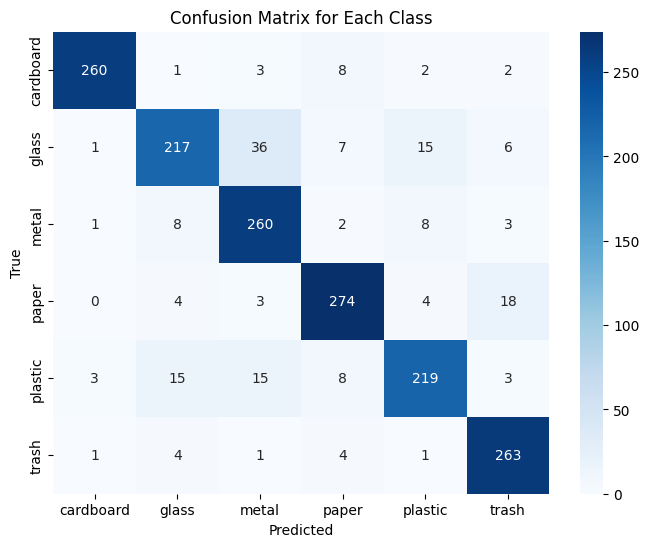

In [29]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Each Class')
plt.show()

1/1 [==============================] - 0s 54ms/step


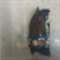

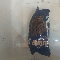

1/1 [==============================] - 0s 102ms/step
Predicted class: trash
1/1 [==============================] - 0s 39ms/step


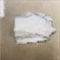

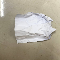

1/1 [==============================] - 0s 115ms/step
Predicted class: paper
1/1 [==============================] - 0s 49ms/step


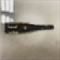

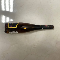

1/1 [==============================] - 0s 113ms/step
Predicted class: glass
1/1 [==============================] - 0s 50ms/step


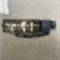

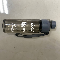

1/1 [==============================] - 0s 78ms/step
Predicted class: glass


In [40]:
def test(path):
  # Load the image
  image = cv2.imread(path)
  if image is None:
    print(f"Error: Could not load image at path {path}")
    return

  # Preprocess the image to match the input shape of the model
  image = cv2.resize(image, (60, 60), interpolation=cv2.INTER_CUBIC)
  image = image / 255.0
  image = np.expand_dims(image, axis=0)

  # Pass the preprocessed image through the autoencoder model
  reconstructed_image = autoencoder.predict(image)
  reconstructed_image = reconstructed_image * 255.0

  # Convert to uint8 for proper display
  reconstructed_image = reconstructed_image.astype(np.uint8)

  # Compare the output image with the original image
  original_image = image * 255.0
  original_image = original_image.astype(np.uint8)

  # Display the original and reconstructed images for comparison
  cv2_imshow(reconstructed_image[0])
  cv2_imshow(original_image[0])

  # Pass the preprocessed image through the model using the predict method
  predictions = model_resnet.predict(reconstructed_image)

  # Convert the output of the model to probabilities using the softmax function
  probabilities = np.exp(predictions)

  # Get the predicted class by finding the index of the highest probability
  predicted_class  = np.argmax(probabilities)

  # Define the list of classes
  classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

  # Print the predicted class and its corresponding label
  class_name = classes[predicted_class]
  print(f"Predicted class: {class_name}")

# Load the image
path ='/content/drive/My Drive/ai/final1/im1.jpg'
test(path)

path ='/content/drive/My Drive/ai/final1/im3.jpg'
test(path)

path ='/content/drive/My Drive/ai/final1/im4.jpg'
test(path)

path ='/content/drive/My Drive/ai/final1/im5.jpg'
test(path)